### Homework

Train NN model with custom linear architecture on MNIST or on any dataset from Kaggle (image data with resolution not higher than 80x80 pixels - Sign language MNIST, A-Z Handwritten Alphabet, etc.)

Visualize epoch progress (loss and accuracy curves)

Visualize 10 random elements from test set and model results for those elements

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

torch.cuda.is_available()

True

Define custom linear architecture

In [8]:
class CustomLinearNN(nn.Module):
    def __init__(self):
        super(CustomLinearNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Load MNIST dataset

In [9]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Initialize model, loss function, and optimizer

In [10]:
model = CustomLinearNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training loop

In [12]:
epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    train_losses.append(running_loss / len(trainloader))

    # Test the model
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

Epoch 1/10, Loss: 0.2202, Train Accuracy: 93.33%, Test Accuracy: 94.78%
Epoch 2/10, Loss: 0.1483, Train Accuracy: 95.44%, Test Accuracy: 95.93%
Epoch 3/10, Loss: 0.1172, Train Accuracy: 96.30%, Test Accuracy: 96.24%
Epoch 4/10, Loss: 0.0981, Train Accuracy: 96.94%, Test Accuracy: 96.31%
Epoch 5/10, Loss: 0.0856, Train Accuracy: 97.25%, Test Accuracy: 97.09%
Epoch 6/10, Loss: 0.0766, Train Accuracy: 97.60%, Test Accuracy: 96.97%
Epoch 7/10, Loss: 0.0679, Train Accuracy: 97.82%, Test Accuracy: 97.42%
Epoch 8/10, Loss: 0.0612, Train Accuracy: 98.03%, Test Accuracy: 97.38%
Epoch 9/10, Loss: 0.0561, Train Accuracy: 98.16%, Test Accuracy: 97.09%
Epoch 10/10, Loss: 0.0509, Train Accuracy: 98.34%, Test Accuracy: 96.94%


Plotting the loss and accuracy curves

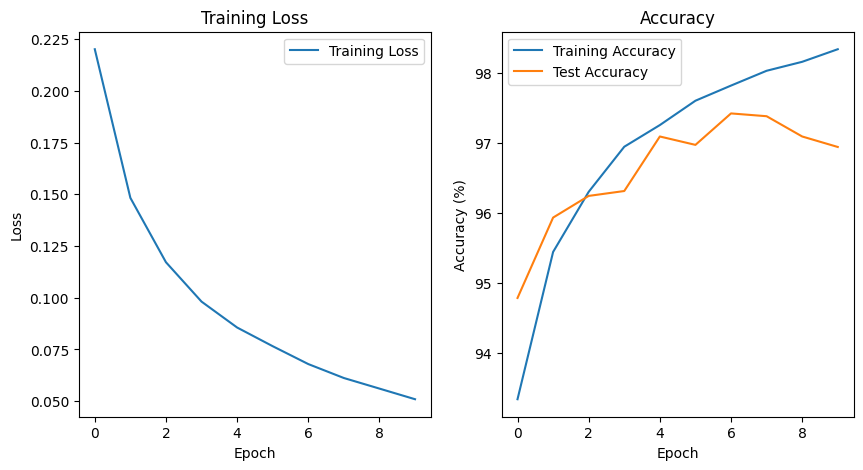

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.legend()
plt.show()

Visualize 10 random elements from the test set and model predictions

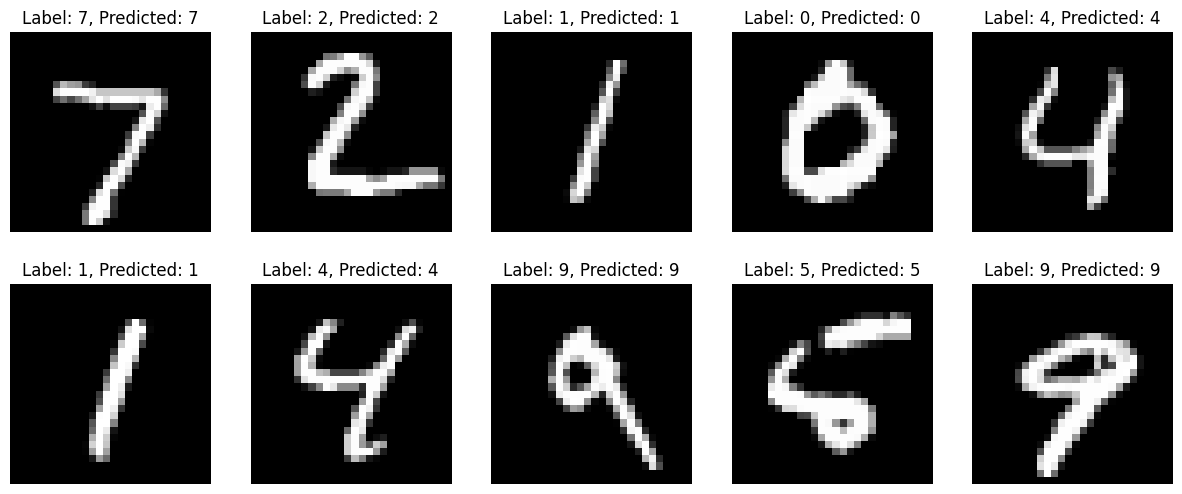

In [14]:
with torch.no_grad():
    images, labels = next(iter(testloader))

    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f'Label: {labels[i]}, Predicted: {predicted[i]}')
        ax.axis('off')
    plt.show()